**DynaQ**:

In this code, we implement DynaQ algorithm and investigate its performance.

By: Behzad Khamidehi

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Rows = 8
Cols = 8
Start = (7,0)
Goal = (0,7)
Blocks = [(7,2), (6,2), (5,2), (0,4), (1,4), (2,4), (3,4), (4,4), (0,6), (1,6),(2,6),\
          (3,6), (4,6), (5,6), (2,0), (2,1)]

#Rows = 6
#Cols = 9
#Start = (2,0)
#Goal = (0,8)
#Blocks = [(1,2), (2,2),(3,2), (4,5), (0,7),(1,7), (2,7) ]
Actions = ['r','u','l','d']

In [195]:
class GridWorld:

  def __init__(self):
    self.action_space = Actions
    self.rows = Rows
    self.cols = Cols
    self.state = Start
    self.Start = Start
    self.Goal = Goal
    self.Blocks = Blocks
    self.done = False
    self.grid = np.zeros((self.rows,self.cols))
    self.grid[self.Goal] = 2
    for i in self.Blocks:
      self.grid[i] = -1



  def reset(self):
    self.state = Start
    self.done = False






  def step(self,action):
    r,c = self.state
    if action =='u':
      r -= 1
    elif action =='d':
      r +=1
    elif action =='r':
      c +=1
    elif action =='l':
      c -=1
    
    if r>=0 and r <=self.rows -1 and c>=0 and c <=self.cols -1:
      if (r,c) not in self.Blocks:
        self.state = (r,c)



    if self.state == self.Goal:
      reward = 1
      self.done = True
    else:
      reward = 0 

    return self.state, reward, self.done, None



  def ShowGrid(self):
    self.grid[self.state] = 1
    for r in range(self.rows):
      print(' ---------------------------------')
      output = ''
      for c in range(self.cols):
        if self.grid[r,c] == 1:
          value = '*' 
        elif self.grid[r,c] ==0:
          value = '0'
        elif self.grid[r,c] ==-1:
          value = 'b'
        elif self.grid[r,c] == 2:
          value = 'G'
        output += ' | '+ value
      print(output + ' | ')
    print(' ---------------------------------')

print('Here is the grid:') 
print('*: position of the agent,  b: block, G:goal')
GridWorld().ShowGrid()

Here is the grid:
*: position of the agent,  b: block, G:goal
 ---------------------------------
 | 0 | 0 | 0 | 0 | b | 0 | b | G | 
 ---------------------------------
 | 0 | 0 | 0 | 0 | b | 0 | b | 0 | 
 ---------------------------------
 | b | b | 0 | 0 | b | 0 | b | 0 | 
 ---------------------------------
 | 0 | 0 | 0 | 0 | b | 0 | b | 0 | 
 ---------------------------------
 | 0 | 0 | 0 | 0 | b | 0 | b | 0 | 
 ---------------------------------
 | 0 | 0 | b | 0 | 0 | 0 | b | 0 | 
 ---------------------------------
 | 0 | 0 | b | 0 | 0 | 0 | 0 | 0 | 
 ---------------------------------
 | * | 0 | b | 0 | 0 | 0 | 0 | 0 | 
 ---------------------------------


In [0]:
class Agent:
  def __init__(self):

    #self.state = State 
    self.rows = Rows
    self.cols = Cols
    self.actions = Actions
    self.Model = {}

    #Q-table initializetion
    self.Q = {}
    for r in range(self.rows):
      for c in range(self.cols):
          self.Q[(r,c)]= {}
          for a in self.actions:
            self.Q[(r,c)][a] = 0 #np.random.rand()


  def action_selection(self, state, eps):
    r, c = state
    if np.random.rand() < eps:
      action = np.random.randint(len(Actions))
    else:
      action = np.argmax(list(self.Q[(r,c)].values()))
    action = Actions[action]
    return action

  def Q_update(self,state, action,next_state,reward):
    #r, c = state
    next_max = max(list(self.Q[next_state].values()))
    self.Q[state][action] = (1 - lr) * self.Q[state][action] + lr * (reward + gamma* next_max)


  def Model_update(self,state, action,next_state, reward):
    if state not in self.Model.keys():
      self.Model[state] = {}
    self.Model[state][action] = (next_state, reward) 


  def n_step_Q_update(self, n):

    for _ in range(n):
      rand_s = np.random.randint(len(self.Model.keys()))
      random_state = list(self.Model)[rand_s]
      rand_a = np.random.randint(len(self.Model[random_state].keys()))
      random_action = list(self.Model[random_state])[rand_a]
      #print(random_action)
      next_state_r , reward_r = self.Model[random_state][random_action]
      #r_ , c_ = random_state
      next_max = max(list(self.Q[random_state].values()))
      self.Q[random_state][random_action] = (1 - lr) * self.Q[random_state][random_action] + lr * (reward_r + gamma* next_max)


  def reset(self):
    self.Q = {}
    for r in range(self.rows):
      for c in range(self.cols):
          self.Q[(r,c)]= {}
          for a in self.actions:
            self.Q[(r,c)][a] = 0 #np.random.rand()
    self.Model = {}


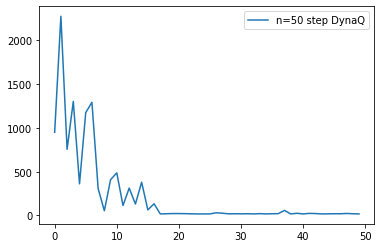

In [178]:
Episodes = 50
lr = 0.1
gamma = 0.95
eps = 0.1
n=50
env = GridWorld()
agent = Agent()
agent.reset()
max_steps_per_episode = 1000
Rewards = []
steps_taken = []
eps_decaying_start = 0
eps_decaying_end = Episodes//1.5
eps_decaying = eps/(eps_decaying_end - eps_decaying_start) 
eps_decaying = 0


for ep in range(Episodes):
  if eps_decaying_start < ep < eps_decaying_end:
        eps -=eps_decaying
  counter = 0
  env.reset()
  done = False
  state = env.state
  Reward_ep = 0
  while not done: # and counter < max_steps_per_episode:
    action = agent.action_selection(state, eps)
    next_state, reward, done, _ = env.step(action)
    agent.Q_update(state, action, next_state, reward)
    Reward_ep += reward
    state = next_state
    counter +=1
    agent.Model_update(state,action, next_state, reward)
    agent.n_step_Q_update(n)

  Rewards.append(Reward_ep)
  steps_taken.append(counter)

#plt.plot(range(Episodes),Rewards)
#plt.show()

plt.plot(range(Episodes),steps_taken,label='n=50 step DynaQ')
plt.legend()
plt.show()

#last200 = np.zeros(Episodes)
#for i in range(Episodes):
#  if i < 10:
#    last200[i] = 0
#  if i >= 10:
#    R_200 = Rewards
#    last200[i] = np.mean(R_200[i-10:i])
#plt.plot(range(Episodes),last200,label='reward per last 10 episodes')
#plt.grid(True)
#plt.legend()
#plt.show()


#last200 = np.zeros(Episodes)
#for i in range(Episodes):
#  if i < 10:
#    last200[i] = 1000
#  if i >= 10:
#    S_200 = steps_taken
#    last200[i] = np.mean(S_200[i-10:i])
#plt.plot(range(Episodes),last200,label=' avg number of steps taken in last 10 episodes')
#plt.grid(True)
#plt.legend()
#plt.show()
     


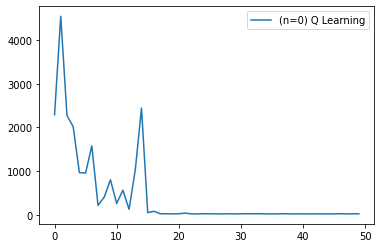

In [188]:
Episodes = 50
lr = 0.1
gamma = 0.95
eps = 0.1
n=0
env = GridWorld()
agent = Agent()
agent.reset()
max_steps_per_episode = 1000
Rewards = []
steps_taken = []
eps_decaying_start = 0
eps_decaying_end = Episodes//1.5
eps_decaying = eps/(eps_decaying_end - eps_decaying_start) 
eps_decaying = 0


for ep in range(Episodes):
  if eps_decaying_start < ep < eps_decaying_end:
        eps -=eps_decaying
  counter = 0
  env.reset()
  done = False
  state = env.state
  Reward_ep = 0
  while not done: # and counter < max_steps_per_episode:
    action = agent.action_selection(state, eps)
    next_state, reward, done, _ = env.step(action)
    agent.Q_update(state, action, next_state, reward)
    Reward_ep += reward
    state = next_state
    counter +=1
    agent.Model_update(state,action, next_state, reward)
    agent.n_step_Q_update(n)

  Rewards.append(Reward_ep)
  steps_taken.append(counter)

#plt.plot(range(Episodes),Rewards)
#plt.show()

plt.plot(range(Episodes),steps_taken, label='(n=0) Q Learning')
plt.legend()
plt.show()
